In [1]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 4.9 MB/s 
     |████████████████████████████████| 5.8 MB 42.5 MB/s 
     |████████████████████████████████| 1.4 MB 52.7 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Dataset link:
https://docs.google.com/spreadsheets/d/1qART38B2l_G7VkJKsjvkIFkDRekeOnTj/edit?usp=sharing&ouid=114253294372712711027&rtpof=true&sd=true

In [3]:
! gdown --id 1qART38B2l_G7VkJKsjvkIFkDRekeOnTj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qART38B2l_G7VkJKsjvkIFkDRekeOnTj
To: /content/Voltage_BOI.xlsx
100% 282k/282k [00:00<00:00, 100MB/s]


In [4]:
df = pd.read_excel('Voltage_BOI.xlsx')
df=df.fillna(0)
df.head()

,B0('9-16'),C0('11-25'),A0('11-28'),B('11-11'),C0('9-20'),B0('9-27'),A0('10-03'),B('10-21'),C('10-24'),B('10-28'),...,B0('10-03'),C0('9-16'),C0('11-28'),C0('9-10'),C('10-30'),C(11-06'),C('11-11'),B0(9-24'),min,d
0,0.0159,0.0063,0.0061,0.0021,0.0039,0.0280,0.0103,0.0016,0.0009,0.0017,...,0.0116,0.0131,0.0046,0.0024,0.0075,0.0013,0.0013,0.0128,0.0,0.00
1,0.0582,0.0504,0.0021,0.0009,0.0052,0.0448,0.0014,0.0009,0.0008,0.0006,...,0.0022,0.0534,0.0027,0.0089,0.0046,0.0040,0.0011,0.0625,5.0,0.00
2,0.1085,0.0667,0.0036,0.0014,0.0191,0.0740,0.0010,0.0013,0.0014,0.0008,...,0.0016,0.0804,0.0060,0.0242,0.0025,0.0094,0.0027,0.1146,10.0,0.01
3,0.1339,0.0679,0.0075,0.0021,0.0500,0.0858,0.0009,0.0016,0.0024,0.0013,...,0.0017,0.1123,0.0098,0.0480,0.0064,0.0176,0.0050,0.1324,15.0,0.01
4,0.1448,0.0666,0.0133,0.0036,0.0789,0.0919,0.0010,0.0020,0.0039,0.0017,...,0.0019,0.1243,0.0154,0.0631,0.0126,0.0279,0.0078,0.1383,20.0,0.01


Definition of input and output data



In [5]:
def train_input_out_data(k):
  return np.array(df.iloc[0:k, 0:40]).transpose(), np.array(df.iloc[k:1511, 0:40]).transpose()
def test_input_out_data(k):
  return np.array(df.iloc[0:k, 40:56]).transpose(), np.array(df.iloc[k:1511, 40:56]).transpose()

In [6]:
x_train_24, y_train_24 = train_input_out_data(289) 
x_test_24, y_test_24 = test_input_out_data(289)

x_train_16, y_train_16 = train_input_out_data(193) 
x_test_16, y_test_16 = test_input_out_data(193)

x_train_12, y_train_12 = train_input_out_data(145)
x_test_12, y_test_12 = test_input_out_data(145)

x_train_8, y_train_8 = train_input_out_data(97)
x_test_8, y_test_8 = test_input_out_data(97)

x_train_6, y_train_6 = train_input_out_data(73)
x_test_6, y_test_6 = test_input_out_data(73)

x_train_2, y_train_2 = train_input_out_data(25)
x_test_2, y_test_2 = test_input_out_data(25)

Neural network model definition and cross-validation

In [7]:
def build_model(x_train, dense, dropout, optimizer='adam'):
  tf.random.set_seed(42)
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(dense[0], activation='relu', input_shape=(x_train.shape[1],)))
  model.add(tf.keras.layers.Dropout(dropout[0]))
  model.add(tf.keras.layers.Dense(dense[1], activation='relu'))
  model.add(tf.keras.layers.Dropout(dropout[1]))
  model.add(tf.keras.layers.Dense(dense[2], activation='relu'))
  model.add(tf.keras.layers.Dropout(dropout[2]))
  model.add(tf.keras.layers.Dense(dense[3]))
  model.compile(optimizer=optimizer, loss='mse', metrics='mae')
  return model

In [8]:
def Cross_Val(x_train, y_train, epochs, dense, dropout):
  train_data = x_train
  train_targets = y_train
  k = 5
  num_val_samples = len(train_data) // k
  num_epochs = epochs
  MAE, MSE = [], []
  VAL_MAE, VAL_MSE = [], []
  all_mae, all_mse = [], []
  val_all_mae, val_all_mse = [], []
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model(train_data, dense, dropout, tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    val_mae_history = history.history['val_mae']
    val_mse_history = history.history['val_loss']
    mae_history = history.history['mae']
    mse_history = history.history['loss']
    VAL_MAE.append(val_mae_history)
    VAL_MSE.append(val_mse_history)
    MAE.append(mae_history)
    MSE.append(mse_history)
    red = model(val_data)
    pred = model(partial_train_data)
    val_mae = mean_absolute_error(val_targets, red)
    val_mse = mean_squared_error(val_targets, red)
    val_all_mae.append(val_mae)
    val_all_mse.append(val_mse)  
    mse = mean_squared_error(partial_train_targets , pred)
    mae = mean_absolute_error(partial_train_targets , pred)
    all_mse.append(mse)
    all_mae.append(mae)
  return MAE, VAL_MAE, MSE, VAL_MSE, val_all_mae, val_all_mse

In [54]:
MAE24, VAL_MAE24, MSE24, VAL_MSE24, val_all_mae24, val_all_mse24 = Cross_Val(x_train_24, y_train_24, 1861, (128, 128, 64, 1222), (0.1, 0.2, 0.5))
MAE16, VAL_MAE16, MSE16, VAL_MSE16, val_all_mae16, val_all_mse16 = Cross_Val(x_train_16, y_train_16, 1909, (128, 64, 64, 1318), (0.1, 0.1, 0.5))
MAE12, VAL_MAE12, MSE12, VAL_MSE12, val_all_mae12, val_all_mse12 = Cross_Val(x_train_12, y_train_12, 1532, (128, 64, 64, 1366), (0.1, 0.3, 0.5))
MAE8, VAL_MAE8, MSE8, VAL_MSE8, val_all_mae8, val_all_mse8 = Cross_Val(x_train_8, y_train_8, 1977, (128, 128, 64, 1414), (0.25, 0.5, 0.5))
MAE6, VAL_MAE6, MSE6, VAL_MSE6, val_all_mae6, val_all_mse6 = Cross_Val(x_train_6, y_train_6, 1803, (128, 64, 64, 1438), (0.2, 0.5, 0.5))
MAE2, VAL_MAE2, MSE2, VAL_MSE2, val_all_mae2, val_all_mse2 = Cross_Val(x_train_2, y_train_2, 460, (128, 128, 64, 1486), (0.3, 0.3, 0.5))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


Average errors over 5 blocks

In [88]:
def print_error_cv(val_all_mae, val_all_mse):
  print(np.array(val_all_mae).mean())
  print(np.array(val_all_mse).mean())
  print(' ')

In [89]:
print_error_cv(val_all_mae24, val_all_mse24)
print_error_cv(val_all_mae16, val_all_mse16)
print_error_cv(val_all_mae12, val_all_mse12)
print_error_cv(val_all_mae8, val_all_mse8)
print_error_cv(val_all_mae6, val_all_mse6)
print_error_cv(val_all_mae2, val_all_mse2)

0.00394615548506368
3.928330974828292e-05
 
0.004765084632291727
6.45061390303019e-05
 
0.00599872642968693
9.603061786907577e-05
 
0.006876326161537853
0.00013944551966801883
 
0.007964343336296401
0.0001675364901033932
 
0.013258331778169947
0.0004561638685746679
 


Choosing an epoch that gives the minimum error on validation

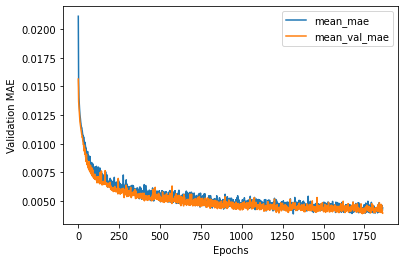

In [56]:
val_average_mae_history24 = [np.mean([x[i] for x in VAL_MAE24]) for i in range(1861)]
average_mae_history24 = [np.mean([x[i] for x in MAE24]) for i in range(1861)]
plt.plot(range(1, len(average_mae_history24) + 1), average_mae_history24,  label='mean_mae')
plt.plot(range(1, len(val_average_mae_history24) + 1), val_average_mae_history24,  label='mean_val_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

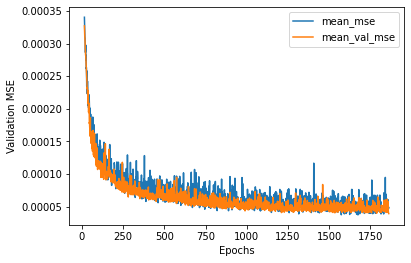

In [57]:
val_loss24 = [np.mean([x[i] for x in VAL_MSE24]) for i in range(1861)]
loss24 = [np.mean([x[i] for x in MSE24]) for i in range(1861)]
import matplotlib.pyplot as plt
plt.plot(range(15, len(average_mae_history24) + 1), loss24[14:],  label='mean_mse')
plt.plot(range(15, len(val_average_mae_history24) + 1), val_loss24[14:], label='mean_val_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [58]:
np.array(val_loss24).min()

3.9283320802496746e-05

In [59]:
j, = np.where(np.array(val_loss24) ==np.array(val_loss24).min())

In [60]:
j

array([1860])

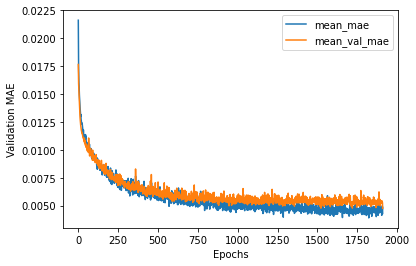

In [61]:
val_average_mae_history16 = [np.mean([x[i] for x in VAL_MAE16]) for i in range(1909)]
average_mae_history16 = [np.mean([x[i] for x in MAE16]) for i in range(1909)]
plt.plot(range(1, len(average_mae_history16) + 1), average_mae_history16,  label='mean_mae')
plt.plot(range(1, len(val_average_mae_history16) + 1), val_average_mae_history16,  label='mean_val_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

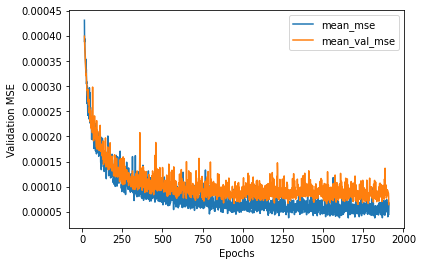

In [62]:
val_loss16 = [np.mean([x[i] for x in VAL_MSE16]) for i in range(1909)]
loss16 = [np.mean([x[i] for x in MSE16]) for i in range(1909)]
import matplotlib.pyplot as plt
plt.plot(range(15, len(average_mae_history16) + 1), loss16[14:],  label='mean_mse')
plt.plot(range(15, len(val_average_mae_history16) + 1), val_loss16[14:], label='mean_val_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [63]:
np.array(val_loss16).min()

6.450613655033522e-05

In [64]:
j, = np.where(np.array(val_loss16) ==np.array(val_loss16).min())

In [65]:
j

array([1908])

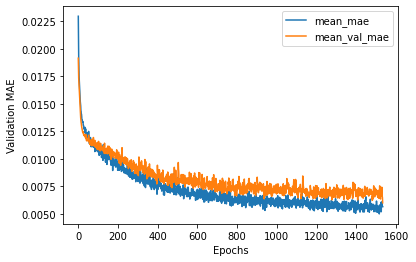

In [66]:
val_average_mae_history12 = [np.mean([x[i] for x in VAL_MAE12]) for i in range(1532)]
average_mae_history12 = [np.mean([x[i] for x in MAE12]) for i in range(1532)]
plt.plot(range(1, len(average_mae_history12) + 1), average_mae_history12,  label='mean_mae')
plt.plot(range(1, len(val_average_mae_history12) + 1), val_average_mae_history12,  label='mean_val_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

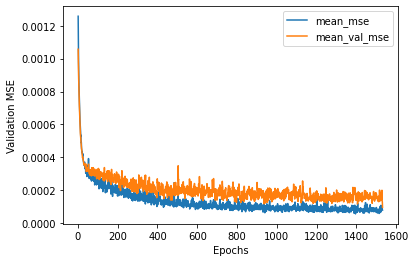

In [67]:
val_loss12 = [np.mean([x[i] for x in VAL_MSE12]) for i in range(1532)]
loss12 = [np.mean([x[i] for x in MSE12]) for i in range(1532)]
plt.plot(range(1, len(average_mae_history12) + 1), loss12,  label='mean_mse')
plt.plot(range(1, len(val_average_mae_history12) + 1), val_loss12, label='mean_val_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [68]:
np.array(val_loss12).min()

9.603064681869e-05

In [69]:
j, = np.where(np.array(val_loss12) ==np.array(val_loss12).min())

In [70]:
j

array([1531])

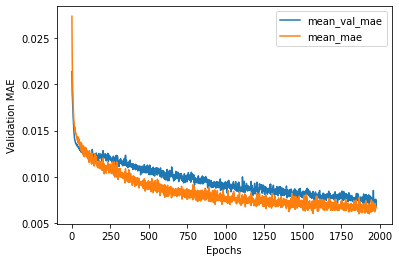

In [71]:
val_average_mae_history8 = [np.mean([x[i] for x in VAL_MAE8]) for i in range(1977)]
average_mae_history8 = [np.mean([x[i] for x in MAE8]) for i in range(1977)]
plt.plot(range(1, len(val_average_mae_history8) + 1), val_average_mae_history8,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history8) + 1), average_mae_history8,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

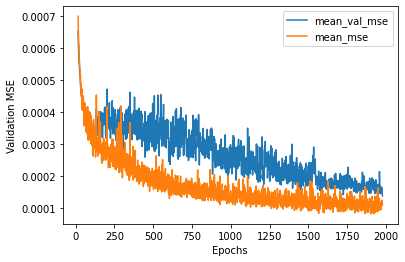

In [72]:
val_loss8 = [np.mean([x[i] for x in VAL_MSE8]) for i in range(1977)]
loss8 = [np.mean([x[i] for x in MSE8]) for i in range(1977)]
plt.plot(range(15, len(val_average_mae_history8) + 1), val_loss8[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history8) + 1), loss8[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [73]:
np.array(val_loss8).min()

0.00013944551319582387

In [74]:
j, = np.where(np.array(val_loss8) ==np.array(val_loss8).min())

In [75]:
j

array([1976])

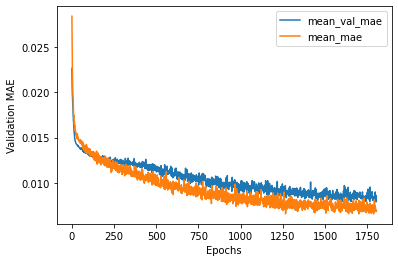

In [76]:
val_average_mae_history6 = [np.mean([x[i] for x in VAL_MAE6]) for i in range(1803)]
average_mae_history6 = [np.mean([x[i] for x in MAE6]) for i in range(1803)]
plt.plot(range(1, len(val_average_mae_history6) + 1), val_average_mae_history6,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history6) + 1), average_mae_history6,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

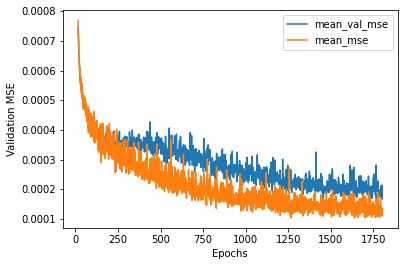

In [77]:
val_loss6 = [np.mean([x[i] for x in VAL_MSE6]) for i in range(1803)]
loss6 = [np.mean([x[i] for x in MSE6]) for i in range(1803)]
plt.plot(range(15, len(val_average_mae_history6) + 1), val_loss6[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history6) + 1), loss6[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [78]:
np.array(val_loss6).min()

0.00016753649979364126

In [79]:
j, = np.where(np.array(val_loss6) ==np.array(val_loss6).min())

In [80]:
j

array([1802])

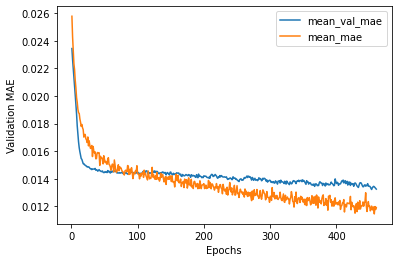

In [81]:
val_average_mae_history2 = [np.mean([x[i] for x in VAL_MAE2]) for i in range(460)]
average_mae_history2 = [np.mean([x[i] for x in MAE2]) for i in range(460)]
plt.plot(range(1, len(val_average_mae_history2) + 1), val_average_mae_history2,  label='mean_val_mae')
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2,  label='mean_mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

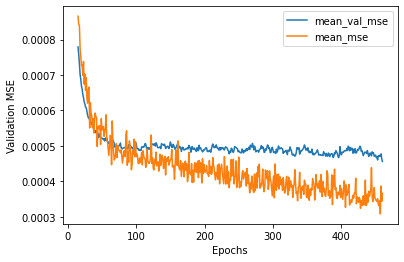

In [82]:
val_loss2 = [np.mean([x[i] for x in VAL_MSE2]) for i in range(460)]
loss2 = [np.mean([x[i] for x in MSE2]) for i in range(460)]
plt.plot(range(15, len(val_average_mae_history2) + 1), val_loss2[14:], label='mean_val_mse')
plt.plot(range(15, len(average_mae_history2) + 1), loss2[14:],  label='mean_mse')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()
plt.show()

In [83]:
np.array(val_loss2).min()

0.00045616388088092207

In [84]:
j, = np.where(np.array(val_loss2) ==np.array(val_loss2).min())

In [85]:
j

array([459])

Files for saving weights and training final ANN models

In [98]:
weights_file24 = 'weights24_indirect.h5'
weights_file16 = 'weights16_indirect.h5'
weights_file12 = 'weights12_indirect.h5'
weights_file8 = 'weights8_indirect.h5'
weights_file6 = 'weights6_indirect.h5'
weights_file2 = 'weights2_indirect.h5'
callback24 = tf.keras.callbacks.ModelCheckpoint(weights_file24, monitor='acc', mode='max')
callback16 = tf.keras.callbacks.ModelCheckpoint(weights_file16, monitor='acc', mode='max')
callback12 = tf.keras.callbacks.ModelCheckpoint(weights_file12, monitor='acc', mode='max')
callback8 = tf.keras.callbacks.ModelCheckpoint(weights_file8, monitor='acc', mode='max')
callback6 = tf.keras.callbacks.ModelCheckpoint(weights_file6, monitor='acc', mode='max')
callback2 = tf.keras.callbacks.ModelCheckpoint(weights_file2, monitor='acc', mode='max')

In [99]:
model24 = build_model(x_train_24, (128, 128, 64, 1222), (0.1, 0.2, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
model16 = build_model(x_train_16, (128, 64, 64, 1318), (0.1, 0.1, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
model12 = build_model(x_train_12, (128, 64, 64, 1366), (0.1, 0.3, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
model8 = build_model(x_train_8, (128, 128, 64, 1414), (0.25, 0.5, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
model6 = build_model(x_train_6, (128, 64, 64, 1438), (0.2, 0.5, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
model2 = build_model(x_train_2, (128, 128, 64, 1486), (0.3, 0.3, 0.5), tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False))
history24 = model24.fit(x_train_24, y_train_24, epochs=1861, batch_size=1, callbacks = [callback24])
history16 = model16.fit(x_train_16, y_train_16, epochs=1909, batch_size=1, callbacks = [callback16])
history12 = model12.fit(x_train_12, y_train_12, epochs=1532, batch_size=1, callbacks = [callback12])
history8 = model8.fit(x_train_8, y_train_8, epochs=1977, batch_size=1, callbacks = [callback8])
history6 = model6.fit(x_train_6, y_train_6, epochs=1803, batch_size=1, callbacks = [callback6])
history2 = model2.fit(x_train_2, y_train_2, epochs=460, batch_size=1, callbacks = [callback2])

Выходные данные были обрезаны до нескольких последних строк (5000).
40/40 [==============================] - 0s 6ms/step - loss: 1.0203e-04 - mae: 0.0070
Epoch 1742/1977
40/40 [==============================] - 0s 6ms/step - loss: 7.7924e-05 - mae: 0.0060
Epoch 1743/1977
40/40 [==============================] - 0s 6ms/step - loss: 1.2293e-04 - mae: 0.0073
Epoch 1744/1977
40/40 [==============================] - 0s 6ms/step - loss: 1.1339e-04 - mae: 0.0070
Epoch 1745/1977
40/40 [==============================] - 0s 6ms/step - loss: 1.3775e-04 - mae: 0.0075
Epoch 1746/1977
40/40 [==============================] - 0s 7ms/step - loss: 1.0371e-04 - mae: 0.0068
Epoch 1747/1977
40/40 [==============================] - 0s 6ms/step - loss: 9.7041e-05 - mae: 0.0065
Epoch 1748/1977
40/40 [==============================] - 0s 6ms/step - loss: 1.1439e-04 - mae: 0.0073
Epoch 1749/1977
40/40 [==============================] - 0s 6ms/step - loss: 1.3044e-04 - mae: 0.0077
Epoch 1750/1977
40/40 [=======


Saving ANN Models

In [100]:
def saves_model(str1, str2, model):
  json_file = str1
  model_json = model.to_json()

  with open(json_file, 'w') as f:
    f.write(model_json)

  with open(json_file, 'r') as f:
    loaded_model = tf.keras.models.model_from_json(f.read())
    
  loaded_model.load_weights(str2)

In [101]:
saves_model('model24_indirect.json', 'weights24_indirect.h5', model24)
saves_model('model16_indirect.json', 'weights16_indirect.h5', model16)
saves_model('model12_indirect.json', 'weights12_indirect.h5', model12)
saves_model('model8_indirect.json', 'weights8_indirect.h5', model8)
saves_model('model6_indirect.json', 'weights6_indirect.h5', model6)
saves_model('model2_indirect.json', 'weights2_indirect.h5', model2)